#Sentiment Analysis of Amazon Reviews

##Importing Libraries

In [ ]:
import psutil

# Print the memory usage
mem = psutil.virtual_memory()
print(f"Used Memory: {mem.used / (1024 ** 2)} MB")
print(f"Total Memory: {mem.total / (1024 ** 2)} MB")


Used Memory: 1201.6171875 MB
Total Memory: 12978.96484375 MB


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')
plt.style.use('ggplot')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df = pd.read_csv('/content/Reviews.csv')

In [ ]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


##Data Preprocessing

In [ ]:
df = df.head(10000)

In [ ]:
df.to_csv('Reviews10k.csv', index=False)

In [ ]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
9995,9996,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...
9996,9997,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ..."
9997,9998,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...
9998,9999,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...


In [ ]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

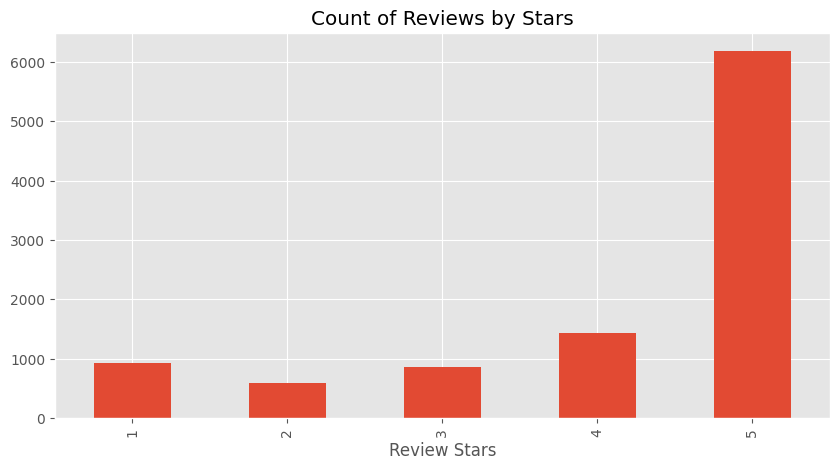

In [ ]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
example = df['Text'][500]
example

"I bought these for the office and no one can put them down. I'm ordering more today and it has only been 2 weeks. Didn't have to shop for them either, Amazon brought it to my door!"

In [ ]:
def categorize_score(score):
    if score in [1,2]:
        return 'negative'
    elif score == 3:
        return 'neutral'
    elif score in [4,5]:
        return 'positive'

df['Sentiment'] = df['Score'].apply(categorize_score)

In [ ]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...,negative
9996,9997,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ...",positive
9997,9998,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...,positive
9998,9999,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...,positive


##Models


#VADER Model

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool specifically designed for analyzing sentiment in social media and text data. It is particularly effective for short texts like tweets and product reviews.

SentimentIntensityAnalyzer is its component that calculates sentiment scores (positive, negative, neutral, and compound) for a given text; the compound score represents the overall sentiment, ranging from -1 (most negative) to +1 (most positive).

We will be using the SentimentIntensityAnalyzer to get the scores.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I feel blue')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.067, 'neu': 0.887, 'pos': 0.046, 'compound': -0.2003}

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0.089,0.852,0.059,-0.5267,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...
9996,9997,0.091,0.747,0.162,0.6808,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ..."
9997,9998,0.063,0.811,0.126,0.9305,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...
9998,9999,0.149,0.697,0.154,0.2809,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...


In [ ]:
# Define a function to classify sentiment based on compound score
def vader_predict_labels(text):
    scores = sia.polarity_scores(text)
    compound_score = scores['compound']

    # Determine sentiment label based on compound score
    if compound_score > 0.05:
        sentiment = 'positive'
    elif compound_score < -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    return sentiment

# Apply the function to your DataFrame to add only the sentiment labels
df['VADER_Sentiment'] = df['Text'].apply(vader_predict_labels)

# Display the first few rows to verify
print(df[['Text', 'VADER_Sentiment']].head())

                                                Text VADER_Sentiment
0  I have bought several of the Vitality canned d...        positive
1  Product arrived labeled as Jumbo Salted Peanut...        negative
2  This is a confection that has been around a fe...        positive
3  If you are looking for the secret ingredient i...         neutral
4  Great taffy at a great price.  There was a wid...        positive


In [ ]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,VADER_Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,neutral
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...,negative,negative
9996,9997,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ...",positive,positive
9997,9998,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...,positive,positive
9998,9999,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...,positive,positive


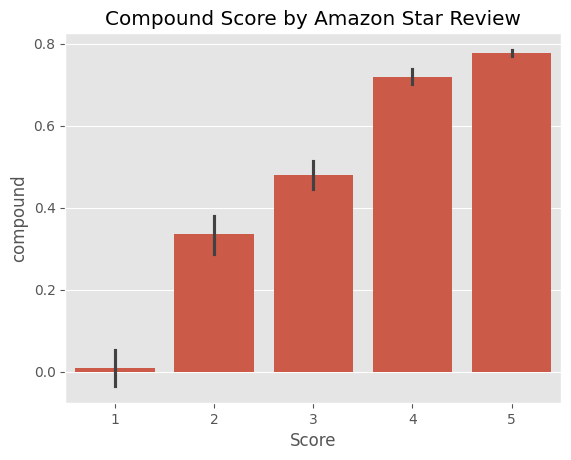

In [ ]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

##Roberta Model

RoBERTa (A Robustly Optimized BERT Pretraining Approach) is a transformer-based language model from Facebook AI that improves upon BERT by removing the Next Sentence Prediction objective, using more training data and epochs, and employing dynamic masking. This results in better performance on various NLP tasks, including sentiment analysis and text classification.

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
example

"I bought these for the office and no one can put them down. I'm ordering more today and it has only been 2 weeks. Didn't have to shop for them either, Amazon brought it to my door!"

##Testing out the model with 10 examples

In [ ]:
def get_roberta_sentiment_test(example):
    # Truncate the input to the maximum length the model can handle
    max_length = 512
    encoded_text = tokenizer(example, return_tensors='pt', max_length=max_length, truncation=True)

    try:
        output = model(**encoded_text)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)

        scores_dict = {
            'roberta_neg': scores[0],
            'roberta_neu': scores[1],
            'roberta_pos': scores[2]
        }

        # Find the sentiment with the highest score
        max_sentiment = max(scores_dict, key=scores_dict.get)

        # Map the sentiment to the appropriate category
        if max_sentiment == 'roberta_pos':
            sentiment_label = 'positive'
        elif max_sentiment == 'roberta_neg':
            sentiment_label = 'negative'
        else:  # roberta_neu
            sentiment_label = 'neutral'

        return sentiment_label, scores_dict  # Return both sentiment and scores
    except RuntimeError as e:
        print(f"Error processing text: {e}")
        return 'error', None  # Return None for scores in case of error

# Apply the sentiment analysis function
df_sample1 = df.head(20)
df_sample1[['Roberta_Sentiment', 'Roberta_Scores']] = df_sample1['Text'].apply(get_roberta_sentiment_test).apply(pd.Series)

print(df_sample1[['Text', 'Roberta_Sentiment', 'Roberta_Scores']])

# Check if there were any errors
error_count = (df_sample1['Roberta_Sentiment'] == 'error').sum()
print(f"\nNumber of errors encountered: {error_count}")

# Optional: Compare with original sentiment if available
if 'Sentiment' in df_sample1.columns:
    agreement = (df_sample1['Roberta_Sentiment'] == df_sample1['Sentiment']).mean()
    print(f"\nAgreement with original sentiment: {agreement:.2%}")


                                                 Text Roberta_Sentiment  \
0   I have bought several of the Vitality canned d...          positive   
1   Product arrived labeled as Jumbo Salted Peanut...          negative   
2   This is a confection that has been around a fe...          positive   
3   If you are looking for the secret ingredient i...          positive   
4   Great taffy at a great price.  There was a wid...          positive   
5   I got a wild hair for taffy and ordered this f...          positive   
6   This saltwater taffy had great flavors and was...          positive   
7   This taffy is so good.  It is very soft and ch...          positive   
8   Right now I'm mostly just sprouting this so my...          positive   
9   This is a very healthy dog food. Good for thei...          positive   
10  I don't know if it's the cactus or the tequila...          positive   
11  One of my boys needed to lose some weight and ...           neutral   
12  My cats have been hap

<ipython-input-47-e980b6469165>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample1[['Roberta_Sentiment', 'Roberta_Scores']] = df_sample1['Text'].apply(get_roberta_sentiment).apply(pd.Series)
<ipython-input-47-e980b6469165>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample1[['Roberta_Sentiment', 'Roberta_Scores']] = df_sample1['Text'].apply(get_roberta_sentiment).apply(pd.Series)


In [51]:
from tqdm import tqdm

# Ensure tqdm works with pandas apply
tqdm.pandas()

# Modify the get_roberta_sentiment function to return only the sentiment label
def get_roberta_sentiment(example):
    max_length = 512
    encoded_text = tokenizer(example, return_tensors='pt', max_length=max_length, truncation=True)

    try:
        output = model(**encoded_text)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)

        scores_dict = {
            'roberta_neg': scores[0],
            'roberta_neu': scores[1],
            'roberta_pos': scores[2]
        }

        max_sentiment = max(scores_dict, key=scores_dict.get)

        if max_sentiment == 'roberta_pos':
            sentiment_label = 'positive'
        elif max_sentiment == 'roberta_neg':
            sentiment_label = 'negative'
        else:  # roberta_neu
            sentiment_label = 'neutral'

        return sentiment_label  # Return only sentiment label
    except RuntimeError as e:
        print(f"Error processing text: {e}")
        return 'error'  # Return 'error' in case of an exception

# Apply the sentiment analysis function to the entire DataFrame with a progress bar
df['Roberta_Sentiment'] = df['Text'].progress_apply(get_roberta_sentiment)

# Display the first few rows to verify
print(df[['Text', 'Roberta_Sentiment']].head())

# Check if there were any errors
error_count = (df['Roberta_Sentiment'] == 'error').sum()
print(f"\nNumber of errors encountered: {error_count}")

# Optional: Compare with original sentiment if available
if 'Sentiment' in df.columns:
    agreement = (df['Roberta_Sentiment'] == df['Sentiment']).mean()
    print(f"\nAgreement with original sentiment: {agreement:.2%}")


100%|██████████| 10000/10000 [1:25:25<00:00,  1.95it/s]

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Text  \
0                                                                                                                                                                                                                                                        I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates thi

##Transformer Pipeline
 The transformer pipeline provides an easy-to-use interface for performing tasks like text classification and sentiment analysis using pre-trained transformer models. It automatically handles tokenization, model inference, and post-processing of results, allowing users to get predictions with just a few lines of code. This simplifies the integration of powerful NLP capabilities into applications without requiring extensive knowledge of model internals.

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
sent_pipeline('i feel blue')

[{'label': 'NEGATIVE', 'score': 0.5952545404434204}]

In [ ]:
sent_pipeline('where is my money?!')

[{'label': 'NEGATIVE', 'score': 0.9989509582519531}]

In [ ]:
sent_pipeline('Sure, Id love to hear your brilliant ideas—who needs sleep anyway?')

[{'label': 'POSITIVE', 'score': 0.9980804920196533}]

While the general transformer pipeline effectively handles sentence-level sentiment analysis, it typically outputs only positive or negative labels. To address this limitation, we will specifically apply a BERT model that classifies text into a range of ratings. We will then convert these ratings into three categories—Positive, Negative, or Neutral—based on the initial sentiment classification.

BERT (Bidirectional Encoder Representations from Transformers) is a pre-trained transformer model designed for natural language processing tasks.
It uses a bidirectional approach to understand the context of words in a sentence by considering both the left and right context.
BERT is trained on large text corpora through tasks like masked language modeling and next sentence prediction, enabling it to generate contextual embeddings for words, which can then be fine-tuned for specific tasks like sentiment analysis, question answering, and more.

In [ ]:
from transformers import pipeline

# Load the sentiment analysis pipeline with the specified model
senti_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Sample texts
texts = [
    "I love this product!",
    "This is the worst experience ever.",
    "It's okay, nothing special."
]

# Get predictions
results = senti_pipeline(texts)

# Display results
for text, result in zip(texts, results):
    print(f"Text: {text} => Sentiment: {result['label']}, Score: {result['score']:.4f}")


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Text: I love this product! => Sentiment: 5 stars, Score: 0.9135
Text: This is the worst experience ever. => Sentiment: 1 star, Score: 0.9438
Text: It's okay, nothing special. => Sentiment: 3 stars, Score: 0.8466


In [ ]:
results

[{'label': '5 stars', 'score': 0.9135048389434814},
 {'label': '1 star', 'score': 0.9438464641571045},
 {'label': '3 stars', 'score': 0.8465540409088135}]

In the output from the sentiment analysis model, each text is assigned a sentiment label (e.g., "5 stars," "1 star") along with a score indicating the model's confidence in that label. The score ranges from 0 to 1, with higher values reflecting greater certainty about the prediction. For example, a score of 0.9135 means the model is 91.35% confident that the sentiment is "5 stars."

In [52]:
from transformers import pipeline
import pandas as pd
from tqdm import tqdm

# Load the sentiment analysis pipeline
senti_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Function to get sentiment using BERT
def get_bert_sentiment(text):
    try:
        result = senti_pipeline(text[:512])[0]  # Limit text to 512 tokens

        # Map the sentiment labels to positive, negative, neutral
        label = result['label']
        if label in ['5 stars', '4 stars']:
            return 'positive'
        elif label in ['1 star', '2 stars']:
            return 'negative'
        else:  # '3 stars'
            return 'neutral'
    except Exception as e:
        print(f"Error processing text: {e}")
        return 'error'

# Enable tqdm for pandas apply
tqdm.pandas()

# Apply the sentiment analysis function to the entire DataFrame with a progress bar
df['BERT_Sentiment'] = df['Text'].progress_apply(get_bert_sentiment)

# Display the first few rows to verify
print(df[['Text', 'BERT_Sentiment']].head())

# Check if there were any errors
error_count = (df['BERT_Sentiment'] == 'error').sum()
print(f"\nNumber of errors encountered: {error_count}")

# Optional: Compare with original sentiment if available
if 'Sentiment' in df.columns:
    agreement = (df['BERT_Sentiment'] == df['Sentiment']).mean()
    print(f"\nAgreement with original sentiment: {agreement:.2%}")

# Optional: Display full sentiment details for the first 10 examples
print("\nDetailed Sentiment Analysis:")
for text in df['Text'].head(10):
    result = senti_pipeline(text[:512])[0]
    print(f"Text: {text[:50]}... => Label: {result['label']}, Score: {result['score']:.4f}")


100%|██████████| 10000/10000 [1:13:26<00:00,  2.27it/s]


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Text  \
0                                                                                                                                                                                                                                                        I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates thi

##Comparision

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate agreement rates
def calculate_agreement(original, model):
    return (original == model).mean()

agreement_vader = calculate_agreement(df['Sentiment'], df['VADER_Sentiment'])
agreement_roberta = calculate_agreement(df['Sentiment'], df['Roberta_Sentiment'])
agreement_bert = calculate_agreement(df['Sentiment'], df['BERT_Sentiment'])

print(f"Agreement with VADER: {agreement_vader:.2%}")
print(f"Agreement with RoBERTa: {agreement_roberta:.2%}")
print(f"Agreement with BERT: {agreement_bert:.2%}")


Agreement with VADER: 78.84%
Agreement with RoBERTa: 84.14%
Agreement with BERT: 82.65%


##Confusion Matrices by Model

**The confusion matrix visualizes how well the model predicts sentiment (positive, neutral, negative). The diagonal values show correct predictions, while off-diagonal values indicate incorrect ones.**


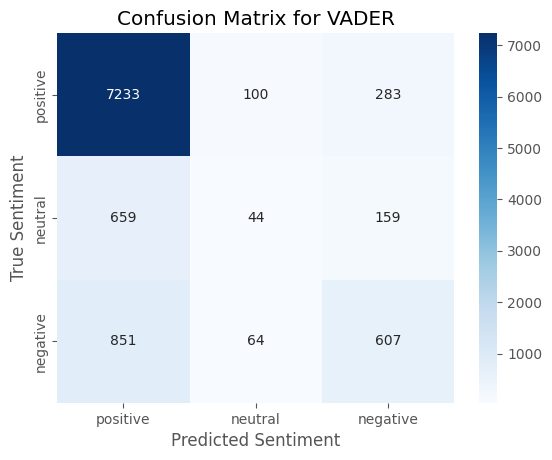

In [57]:
# Confusion matrix for VADER
conf_matrix_vader = confusion_matrix(df['Sentiment'], df['VADER_Sentiment'], labels=['positive', 'neutral', 'negative'])
sns.heatmap(conf_matrix_vader, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.title("Confusion Matrix for VADER")
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.show()

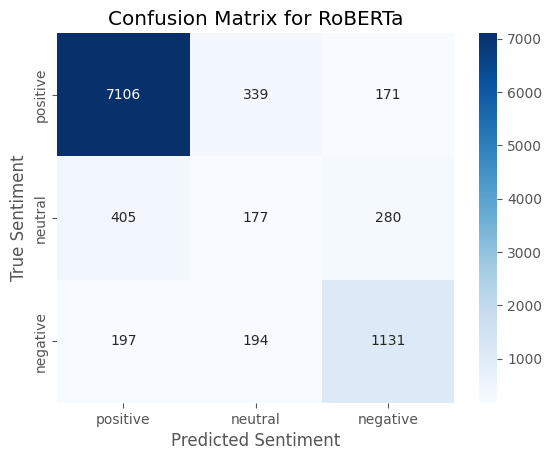

In [58]:
# Repeat for other models
conf_matrix_roberta = confusion_matrix(df['Sentiment'], df['Roberta_Sentiment'], labels=['positive', 'neutral', 'negative'])
sns.heatmap(conf_matrix_roberta, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.title("Confusion Matrix for RoBERTa")
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.show()


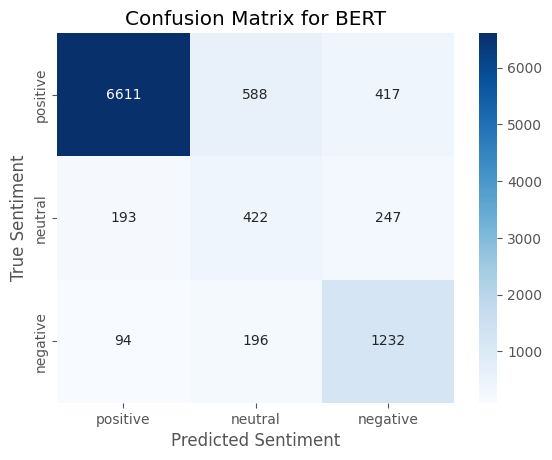

In [59]:
conf_matrix_bert = confusion_matrix(df['Sentiment'], df['BERT_Sentiment'], labels=['positive', 'neutral', 'negative'])
sns.heatmap(conf_matrix_bert, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.title("Confusion Matrix for BERT")
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.show()


##Classification Report

In [60]:
# Classification report for VADER
print("Classification Report for VADER:")
print(classification_report(df['Sentiment'], df['VADER_Sentiment'], target_names=['positive', 'neutral', 'negative']))

# Repeat for other models
print("Classification Report for RoBERTa:")
print(classification_report(df['Sentiment'], df['Roberta_Sentiment'], target_names=['positive', 'neutral', 'negative']))

print("Classification Report for BERT:")
print(classification_report(df['Sentiment'], df['BERT_Sentiment'], target_names=['positive', 'neutral', 'negative']))


Classification Report for VADER:
              precision    recall  f1-score   support

    positive       0.58      0.40      0.47      1522
     neutral       0.21      0.05      0.08       862
    negative       0.83      0.95      0.88      7616

    accuracy                           0.79     10000
   macro avg       0.54      0.47      0.48     10000
weighted avg       0.74      0.79      0.75     10000

Classification Report for RoBERTa:
              precision    recall  f1-score   support

    positive       0.71      0.74      0.73      1522
     neutral       0.25      0.21      0.23       862
    negative       0.92      0.93      0.93      7616

    accuracy                           0.84     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.83      0.84      0.84     10000

Classification Report for BERT:
              precision    recall  f1-score   support

    positive       0.65      0.81      0.72      1522
     neutral       0.35      

In [65]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
vader_accuracy = accuracy_score(df['Sentiment'], df['VADER_Sentiment'])
roberta_accuracy = accuracy_score(df['Sentiment'], df['Roberta_Sentiment'])
bert_accuracy = accuracy_score(df['Sentiment'], df['BERT_Sentiment'])

# Create a DataFrame to display the accuracies side by side
accuracy_df = pd.DataFrame({
    'Model': ['VADER', 'RoBERTa', 'BERT'],
    'Accuracy': [vader_accuracy, roberta_accuracy, bert_accuracy]
})

# Display the accuracies
print(accuracy_df)


     Model  Accuracy
0    VADER    0.7884
1  RoBERTa    0.8414
2     BERT    0.8265


####After comparing the three models with the original sentiment column based on ratings, we conclude that RoBERTa outperforms the others, achieving the highest accuracy of **0.84**.

## Additional Analysis: Evaluating the Correlation Between Helpfulness Percentage and Sentiment Labels

This section explores the relationship between the helpfulness percentage of reviews and the sentiment labels derived from different sentiment analysis models. By examining this correlation, we aim to understand whether more helpful reviews tend to have specific sentiment classifications.

In [61]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Sentiment', 'VADER_Sentiment', 'Roberta_Sentiment', 'BERT_Sentiment'],
      dtype='object')

In [63]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named df and has columns 'HelpfulnessNumerator' and 'HelpfulnessDenominator'
# Create the helpfulness ratio column
df['Helpfulness_Ratio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'].replace(0, np.nan)  # Avoid division by zero
df['Helpfulness_Ratio'].fillna(0, inplace=True)  # Replace NaN values with 0 if denominator was 0

# Now, let's analyze the correlation between helpfulness ratio and sentiment labels
# Convert sentiment labels to numeric values for correlation
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}

# Assuming you have columns for each sentiment model's labels, e.g., 'VADER_Sentiment', 'RoBERTa_Sentiment', 'BERT_Sentiment'
for col in ['VADER_Sentiment', 'Roberta_Sentiment', 'BERT_Sentiment']:
    df[col + '_Numeric'] = df[col].map(sentiment_mapping)

# Calculate correlation
correlation_results = df[['Helpfulness_Ratio'] + [col + '_Numeric' for col in ['VADER_Sentiment', 'Roberta_Sentiment', 'BERT_Sentiment']]].corr()

# Display the correlation results
print(correlation_results)


                           Helpfulness_Ratio  VADER_Sentiment_Numeric  \
Helpfulness_Ratio                   1.000000                 0.012601   
VADER_Sentiment_Numeric             0.012601                 1.000000   
Roberta_Sentiment_Numeric           0.015054                 0.538098   
BERT_Sentiment_Numeric              0.004831                 0.431414   

                           Roberta_Sentiment_Numeric  BERT_Sentiment_Numeric  
Helpfulness_Ratio                           0.015054                0.004831  
VADER_Sentiment_Numeric                     0.538098                0.431414  
Roberta_Sentiment_Numeric                   1.000000                0.719142  
BERT_Sentiment_Numeric                      0.719142                1.000000  


In [64]:
correlation_results

,Helpfulness_Ratio,VADER_Sentiment_Numeric,Roberta_Sentiment_Numeric,BERT_Sentiment_Numeric
Helpfulness_Ratio,1.000000,0.012601,0.015054,0.004831
VADER_Sentiment_Numeric,0.012601,1.000000,0.538098,0.431414
Roberta_Sentiment_Numeric,0.015054,0.538098,1.000000,0.719142
BERT_Sentiment_Numeric,0.004831,0.431414,0.719142,1.000000


The correlation matrix shows that the helpfulness ratio has low correlation with sentiment outputs from VADER, RoBERTa, and BERT, indicating that a review's helpfulness does not significantly relate to its sentiment. VADER sentiment correlates moderately with RoBERTa and BERT, suggesting some agreement among these models in sentiment predictions. The high correlation between RoBERTa and BERT indicates they often produce similar results. This analysis can inform model selection and interpretation while revealing opportunities to refine your approach to understanding user reviews.

#END